In [1]:
import pandas as pd
import numpy as np
import datetime

In [92]:
import math
import matplotlib.pyplot as plt

In [3]:
dfs = []
fnames = ['Week 1 AU Football Forecasting Competition.csv',
         'Week 2 AU Football Forecasting Competition.csv',
         'Week 3 AU Football Forecasting Competition.csv',
         'Week 4 AU Football Forecasting Competition.csv',
         'Week 5 AU Football Forecasting Competition.csv',
         'Week 6 AU Football Forecasting Competition.csv',
         'Week 7 AU Football Forecasting Competition.csv',
         'Week 8 AU Football Forecasting Competition.csv',
         'Week 9 AU Football Forecasting Competition.csv',
         'Week 10 AU Football Forecasting Competition.csv',
         'Week 11 AU Football Forecasting Competition.csv']

In [4]:
for i in range(11):
    dfs.append(pd.read_csv(fnames[i]))

In [5]:
group1 = []
group2 = []
group3 = []

In [6]:
group1.append(dfs[0][dfs[0]['Collector ID'] == 246459632.0])
group2.append(dfs[0][dfs[0]['Collector ID'] == 246459794.0])
group3.append(dfs[0][dfs[0]['Collector ID'] == 246459113.0])

# The collectors used are different for each week. The only collectors that I know the labels for are the first week. The email addresses are the same.

In [7]:
emails1 = group1[0]['Email Address']
emails2 = group2[0]['Email Address']
emails3 = group3[0]['Email Address']

In [11]:
for i in range(1,11):
    group1.append(dfs[i][dfs[i]['Email Address'].isin(emails1)])
    group2.append(dfs[i][dfs[i]['Email Address'].isin(emails2)])
    group3.append(dfs[i][dfs[i]['Email Address'].isin(emails3)])

In [12]:
counts1 = {} 
for i in range(0,11):
    emails = group1[i]
    email_list = list(emails['Email Address'])
    for j in range(len(email_list)):
        try:
            counts1[email_list[j]] += 1
        except KeyError:
            counts1[email_list[j]] = 1

In [13]:
cts1 = list(counts1.values())
cts1u = list(counts1.values())
cts1.sort()
print(cts1) 
print(len(cts1))

[1, 1, 1, 2, 4, 5, 6, 6, 6, 6, 7, 9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
54


In [14]:
counts2 = {} 
for i in range(0,11):
    emails = group2[i]
    email_list = list(emails['Email Address'])
    for j in range(len(email_list)):
        try:
            counts2[email_list[j]] += 1
        except KeyError:
            counts2[email_list[j]] = 1

In [15]:
cts2 = list(counts2.values())
cts2u = list(counts2.values())
cts2.sort()
print(cts2) 
print(len(cts2))

[1, 1, 8, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
49


In [16]:
counts3 = {} 
for i in range(0,11):
    emails = group3[i]
    email_list = list(emails['Email Address'])
    for j in range(len(email_list)):
        try:
            counts3[email_list[j]] += 1
        except KeyError:
            counts3[email_list[j]] = 1

In [17]:
cts3 = list(counts3.values())
cts3u = list(counts3.values())
cts3.sort()
print(cts3) 
print(len(cts3))

[2, 5, 5, 6, 7, 8, 8, 8, 9, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
50


# Computing Scores

In [255]:
group1tot = group1[0]
group2tot = group2[0]

group3tot = group3[0]
for i in range(1,11):
    group1tot = group1tot.merge(group1[i],on='Email Address')
    group2tot = group2tot.merge(group2[i],on='Email Address')
    group3tot = group3tot.merge(group3[i],on='Email Address')

In [256]:
group1tot.shape #43 #5 #17 #21

(41, 245)

In [257]:
group2tot.shape #46 #5 #18 #23

(39, 245)

In [258]:
group3tot.shape #42 #5 #15 #21

(39, 245)

## Group 1

In [259]:
group1tot = group1tot.iloc[:,3:]
group1tot = pd.concat([group1tot.iloc[:,0], group1tot.iloc[:,2:]], axis=1)
group1tot = pd.concat([group1tot.iloc[:,:2], group1tot.iloc[:,5:]], axis=1)
group1tot = pd.concat([group1tot.iloc[:,:17], group1tot.iloc[:,19:]], axis=1)
group1tot = pd.concat([group1tot.iloc[:,:19], group1tot.iloc[:,23:]], axis=1)
group1tot = pd.concat([group1tot.iloc[:,:31], group1tot.iloc[:,33:35], group1tot.iloc[:,39:]], axis=1)
group1tot = pd.concat([group1tot.iloc[:,:42], group1tot.iloc[:,44:46], group1tot.iloc[:,50:]], axis=1)

In [260]:
group1tot = pd.concat([group1tot.iloc[:,:62], group1tot.iloc[:,64:66], group1tot.iloc[:,70:]], axis=1)
group1tot = pd.concat([group1tot.iloc[:,:85], group1tot.iloc[:,87:89], group1tot.iloc[:,93:]], axis=1)
group1tot = pd.concat([group1tot.iloc[:,:102], group1tot.iloc[:,104:106], group1tot.iloc[:,110:]], axis=1)
group1tot = pd.concat([group1tot.iloc[:,:116], group1tot.iloc[:,118:120], group1tot.iloc[:,124:]], axis=1)
group1tot = pd.concat([group1tot.iloc[:,:130], group1tot.iloc[:,132:134], group1tot.iloc[:,138:]], axis=1)
group1tot = pd.concat([group1tot.iloc[:,:150], group1tot.iloc[:,152:154], group1tot.iloc[:,158:]], axis=1)
group1tot = pd.concat([group1tot.iloc[:,:161], group1tot.iloc[:,163:165], group1tot.iloc[:,169:]], axis=1)

In [261]:
group1tot.shape

(41, 178)

## Group 2

In [262]:
group2tot = group2tot.iloc[:,3:]
group2tot = pd.concat([group2tot.iloc[:,0], group2tot.iloc[:,2:]], axis=1)
group2tot = pd.concat([group2tot.iloc[:,:2], group2tot.iloc[:,5:]], axis=1)
group2tot = pd.concat([group2tot.iloc[:,:17], group2tot.iloc[:,19:]], axis=1)
group2tot = pd.concat([group2tot.iloc[:,:19], group2tot.iloc[:,23:]], axis=1)
group2tot = pd.concat([group2tot.iloc[:,:31], group2tot.iloc[:,33:35], group2tot.iloc[:,39:]], axis=1)
group2tot = pd.concat([group2tot.iloc[:,:42], group2tot.iloc[:,44:46], group2tot.iloc[:,50:]], axis=1)

In [263]:
group2tot = pd.concat([group2tot.iloc[:,:62], group2tot.iloc[:,64:66], group2tot.iloc[:,70:]], axis=1)
group2tot = pd.concat([group2tot.iloc[:,:85], group2tot.iloc[:,87:89], group2tot.iloc[:,93:]], axis=1)
group2tot = pd.concat([group2tot.iloc[:,:102], group2tot.iloc[:,104:106], group2tot.iloc[:,110:]], axis=1)
group2tot = pd.concat([group2tot.iloc[:,:116], group2tot.iloc[:,118:120], group2tot.iloc[:,124:]], axis=1)
group2tot = pd.concat([group2tot.iloc[:,:130], group2tot.iloc[:,132:134], group2tot.iloc[:,138:]], axis=1)
group2tot = pd.concat([group2tot.iloc[:,:150], group2tot.iloc[:,152:154], group2tot.iloc[:,158:]], axis=1)
group2tot = pd.concat([group2tot.iloc[:,:161], group2tot.iloc[:,163:165], group2tot.iloc[:,169:]], axis=1)

In [264]:
group2tot.shape

(39, 178)

## Group 3

In [265]:
group3tot = group3tot.iloc[:,3:]
group3tot = pd.concat([group3tot.iloc[:,0], group3tot.iloc[:,2:]], axis=1)
group3tot = pd.concat([group3tot.iloc[:,:2], group3tot.iloc[:,5:]], axis=1)
group3tot = pd.concat([group3tot.iloc[:,:17], group3tot.iloc[:,19:]], axis=1)
group3tot = pd.concat([group3tot.iloc[:,:19], group3tot.iloc[:,23:]], axis=1)
group3tot = pd.concat([group3tot.iloc[:,:31], group3tot.iloc[:,33:35], group3tot.iloc[:,39:]], axis=1)
group3tot = pd.concat([group3tot.iloc[:,:42], group3tot.iloc[:,44:46], group3tot.iloc[:,50:]], axis=1)

In [266]:
group3tot = pd.concat([group3tot.iloc[:,:62], group3tot.iloc[:,64:66], group3tot.iloc[:,70:]], axis=1)
group3tot = pd.concat([group3tot.iloc[:,:85], group3tot.iloc[:,87:89], group3tot.iloc[:,93:]], axis=1)
group3tot = pd.concat([group3tot.iloc[:,:102], group3tot.iloc[:,104:106], group3tot.iloc[:,110:]], axis=1)
group3tot = pd.concat([group3tot.iloc[:,:116], group3tot.iloc[:,118:120], group3tot.iloc[:,124:]], axis=1)
group3tot = pd.concat([group3tot.iloc[:,:130], group3tot.iloc[:,132:134], group3tot.iloc[:,138:]], axis=1)
group3tot = pd.concat([group3tot.iloc[:,:150], group3tot.iloc[:,152:154], group3tot.iloc[:,158:]], axis=1)
group3tot = pd.concat([group3tot.iloc[:,:161], group3tot.iloc[:,163:165], group3tot.iloc[:,169:]], axis=1)

In [267]:
group3tot.shape

(39, 178)

In [429]:
group1tot.iloc[:,170:].head()

,Unnamed: 16,What probability do you assign to this?.2,Auburn will beat Alabama?,Unnamed: 19,What probability do you assign to this?.3,Tennessee will beat Vanderbilt?,Unnamed: 22_y,What probability do you assign to this?.4_y
0,NaN,98,True,NaN,99,True,NaN,96
1,NaN,100,True,NaN,48,True,NaN,100
2,NaN,100,True,NaN,100,True,NaN,100
3,NaN,100,True,NaN,100,True,NaN,100
4,NaN,73,NaN,False,24,True,NaN,41


### Encoding the results of the games

In [430]:
outcomes = []
ignore = [2,2,0,None,1,1,2,None,0,None,3]
# Vandy vs LSU, Florida vs TN, A&M vs AU, Miss St vs KY, Mizzou vs SC
week1 = [False,True,False,True,True] #17
outcomes.append(week1)
# Arkansas vs A&M, Bama vs Miss, AU vs Miss St, SC vs KY
week2 = [False,True,True,True] #14
outcomes.append(week2)
# Florida vs AU, TN vs UGA, Miss vs Vandy
week3 = [True,False,True] #11
outcomes.append(week3)
# UGA vs SC, TN vs Miss St, A&M vs Bama, KY vs Arkansas, Mizzou vs Miss, LSU vs Florida 
week4 = [False,True,False,True,True,True] #20
outcomes.append(week4)
# SC vs Florida, Arkansas vs AU, Miss St vs LSU, Vandy vs Mizzou, UGA vs KY, Miss vs A&M, Bama vs TN
week5 = [False,False,False,True,True,False,True] #23
outcomes.append(week5)
# A&M vs Miss St, LSU vs AU, TN vs SC, Bama vs Arkansas, KY vs Mizzou
week6 = [True,True,True,True,True] #17
outcomes.append(week6)
# Florida vs UGA, Arkansas vs Miss St, AU vs Miss, SC vs Vandy 
week7 = [False,False,True,True] #14
outcomes.append(week7)
# Florida vs Vandy, Bama vs LSU, UGA vs Mizzou, KY vs TN
week8 = [True,False,True,False] #14
outcomes.append(week8)
# AU vs UGA, Miss St vs Bama, Mizzou vs FL, Vandy vs KY, Miss vs LSU, A&M vs SC
week9 = [False,False,False,False,False,True] #20
outcomes.append(week9)
# LSU vs Arkansas, UGA vs A&M, Mizzou vs TN
week10 = [True,True,False] #11
outcomes.append(week10)
# Miss St vs Miss, Arkansas vs Mizzou, LSU vs A&M, AU vs Bama, TN vs Vandy
week11 = [True,False,True,True,True] #17
outcomes.append(week11)

### Encoding the indices

In [270]:
indicies = [18,32,43,63,86,103,117,131,151,162]

### Check dates & times

In [635]:
check = datetime.datetime(2019,9,28,12,0,0)
g1ok = group1tot[pd.to_datetime(group1tot.iloc[:,0]) < check]
g2ok = group2tot[pd.to_datetime(group2tot.iloc[:,0]) < check]
g3ok = group3tot[pd.to_datetime(group3tot.iloc[:,0]) < check]

In [636]:
print(g1ok.shape)
print(g2ok.shape)
print(g3ok.shape)

(36, 179)
(38, 179)
(39, 178)


In [637]:
check = datetime.datetime(2019,9,28,12,0,0)
g1ok = g1ok[pd.to_datetime(g1ok.iloc[:,18]) < check]
g2ok = g2ok[pd.to_datetime(g2ok.iloc[:,18]) < check]
g3ok = g3ok[pd.to_datetime(g3ok.iloc[:,18]) < check]

In [638]:
# one person submitted late week 2

In [639]:
print(g1ok.shape)
print(g2ok.shape)
print(g3ok.shape)

(34, 179)
(38, 179)
(39, 178)


In [640]:
check = datetime.datetime(2019,10,5,12,0,0)
g1ok = g1ok[pd.to_datetime(g1ok.iloc[:,32]) < check]
g2ok = g2ok[pd.to_datetime(g2ok.iloc[:,32]) < check]
g3ok = g3ok[pd.to_datetime(g3ok.iloc[:,32]) < check]
print(g1ok.shape)
print(g2ok.shape)
print(g3ok.shape)

(34, 179)
(38, 179)
(39, 178)


In [641]:
check = datetime.datetime(2019,10,12,12,0,0)
g1ok = g1ok[pd.to_datetime(g1ok.iloc[:,43]) < check]
g2ok = g2ok[pd.to_datetime(g2ok.iloc[:,43]) < check]
g3ok = g3ok[pd.to_datetime(g3ok.iloc[:,43]) < check]
print(g1ok.shape)
print(g2ok.shape)
print(g3ok.shape)

(34, 179)
(38, 179)
(38, 178)


In [642]:
# one person was late on week 4

In [643]:
check = datetime.datetime(2019,10,19,12,0,0)
g1ok = g1ok[pd.to_datetime(g1ok.iloc[:,63]) < check]
g2ok = g2ok[pd.to_datetime(g2ok.iloc[:,63]) < check]
g3ok = g3ok[pd.to_datetime(g3ok.iloc[:,63]) < check]
print(g1ok.shape)
print(g2ok.shape)
print(g3ok.shape)

(34, 179)
(38, 179)
(38, 178)


In [644]:
# one person was late on week 5

In [645]:
check = datetime.datetime(2019,10,26,12,0,0)
g1ok = g1ok[pd.to_datetime(g1ok.iloc[:,86]) < check]
g2ok = g2ok[pd.to_datetime(g2ok.iloc[:,86]) < check]
g3ok = g3ok[pd.to_datetime(g3ok.iloc[:,86]) < check]
print(g1ok.shape)
print(g2ok.shape)
print(g3ok.shape)

(34, 179)
(38, 179)
(38, 178)


In [646]:
check = datetime.datetime(2019,11,2,12,0,0)
g1ok = g1ok[pd.to_datetime(g1ok.iloc[:,103]) < check]
g2ok = g2ok[pd.to_datetime(g2ok.iloc[:,103]) < check]
g3ok = g3ok[pd.to_datetime(g3ok.iloc[:,103]) < check]
print(g1ok.shape)
print(g2ok.shape)
print(g3ok.shape)

(34, 179)
(38, 179)
(38, 178)


In [647]:
check = datetime.datetime(2019,11,9,12,0,0)
g1ok = g1ok[pd.to_datetime(g1ok.iloc[:,117]) < check]
g2ok = g2ok[pd.to_datetime(g2ok.iloc[:,117]) < check]
g3ok = g3ok[pd.to_datetime(g3ok.iloc[:,117]) < check]
print(g1ok.shape)
print(g2ok.shape)
print(g3ok.shape)

(34, 179)
(38, 179)
(38, 178)


In [648]:
check = datetime.datetime(2019,11,16,12,0,0)
g1ok = g1ok[pd.to_datetime(g1ok.iloc[:,131]) < check]
g2ok = g2ok[pd.to_datetime(g2ok.iloc[:,131]) < check]
g3ok = g3ok[pd.to_datetime(g3ok.iloc[:,131]) < check]
print(g1ok.shape)
print(g2ok.shape)
print(g3ok.shape)

(34, 179)
(38, 179)
(38, 178)


In [649]:
check = datetime.datetime(2019,11,23,12,0,0)
g1ok = g1ok[pd.to_datetime(g1ok.iloc[:,151]) < check]
g2ok = g2ok[pd.to_datetime(g2ok.iloc[:,151]) < check]
g3ok = g3ok[pd.to_datetime(g3ok.iloc[:,151]) < check]
print(g1ok.shape)
print(g2ok.shape)
print(g3ok.shape)

(33, 179)
(38, 179)
(38, 178)


In [650]:
# one late participant

In [651]:
check = datetime.datetime(2019,11,30,12,0,0)
g1ok = g1ok[pd.to_datetime(g1ok.iloc[:,162]) < check]
g2ok = g2ok[pd.to_datetime(g2ok.iloc[:,162]) < check]
g3ok = g3ok[pd.to_datetime(g3ok.iloc[:,162]) < check]
print(g1ok.shape)
print(g2ok.shape)
print(g3ok.shape)

(33, 179)
(38, 179)
(38, 178)


## Evaluation

In [1747]:
IGNORE = True
ISOLATE = False
weeks = 11

In [1748]:
#no1

In [1749]:
tscores = None
scores1 = None
scorest1 = None
probs = None
probsl = None
probsdf = None
points1 = None
log = None
log_score = None
emails1 = 'x'

In [1750]:
ct = 0
count = 2
scores1 = np.zeros(38)
emails = g1ok['Email Address']
for it, outcome in enumerate(outcomes[:weeks]):
    #print (outcome)
    for ig, game in enumerate(outcome):
        if ig == ignore[it] and IGNORE == True:
            count += 3
            ct += 1
            continue
        if ig != ignore[it] and ISOLATE == True:
            count += 3
            ct += 1
            continue
        #print (ig)
        #print (game)
        if game == True:
            #add incrementing for scoring - add to count
            #add each new df in place of old
            #add tscore for each group
            tscores = g1ok.iloc[:,count]*1
            tscores = tscores.fillna(0)
            #get prob
            probs = g1ok.iloc[:,count+2]
            #limit prob at 99
            probs = pd.to_numeric(probs.iloc[:], downcast="float")
            probs[probs.iloc[:] > 99] = 99
            probs[probs.iloc[:] < 1] = 1
            #compute log score
            probsl = probs.values.tolist()
            log = np.zeros(len(probsl))
            tscoresl = np.array(tscores)
            #include email key
            emailz = []
            for i, prob in enumerate(probsl):
                emailz.append(emails.iloc[i])
                #print (prob)
                x = math.log(prob/100.)
                if tscoresl[i] == 1:
                    x = x/2. + 0.5
                else: 
                    x = x/2.
                log[i] = ((10/(-0.00436+0.301))*(x+0.301))
            log_score = pd.DataFrame(log)
            try: 
                scores1 = pd.concat([scores1,tscores],axis=1)
                probsdf = pd.concat([probsdf,probs],axis=1)
                #scorest1 += tscores
                #probsdf[alphabet[ct]] = probs
                #points1 = points1 + log_score
                #log_score = pd.DataFrame(log_score)
                #emails1 = pd.concat([emails1,log_score],axis=1)
                #print ('no error')
            except:
                scores1 = tscores
                scorest1 = tscores
                probsdf = probs
                points1 = log_score
                emails1 = pd.DataFrame(emailz)
                #log_score = pd.DataFrame(log_score)
                #emails1 = pd.concat([emails1,log_score],axis=1)
                #print ('error')
            try:
                log_score = pd.DataFrame(log_score)
                emails1 = pd.concat([emails1,log_score],axis=1)   
                #print("EMAILS")
            except:
                emails1 = pd.DataFrame(emailz)
                log_score = pd.DataFrame(log_score)
                emails1 = pd.concat([emails1,log_score],axis=1)
                #print("ERROR")
            #add to count to balance
            count += 3
        if game == False:
            #add incrementing for scoring - add to count
            count += 1
            #add new dfs instead of old
            #add new tscore for each group
            tscores = g1ok.iloc[:,count][g1ok.iloc[:,count].fillna(0)*1 == 0]+1
            tscores = tscores.fillna(0)
            #get prob
            probs = g1ok.iloc[:,count+1]
            probs = pd.to_numeric(probs.iloc[:], downcast="float")
            #limit prob at 99
            probs[probs.iloc[:] > 99.] = 99.
            probs[probs.iloc[:] < 1] = 1
            #compute log score
            probsl = probs.values.tolist()
            log = np.zeros(len(probsl))
            tscoresl = np.array(tscores)
            #keep emails
            emailz = []
            for i, prob in enumerate(probsl):
                #print (prob)
                emailz.append(emails.iloc[i])
                x = math.log(prob/100.)
                if tscoresl[i] == 1:
                    x = x/2. + 0.5
                else: 
                    x = x/2.
                log[i] = ((10/(-0.00436+0.301))*(x+0.301))
            log_score = pd.DataFrame(log)
            try: 
                scores1 = pd.concat([scores1,tscores],axis=1)
                probsdf = pd.concat([probsdf,probs],axis=1)
                points1 = points1 + log_score
                #print ('no error')
            except:
                scores1 = tscores
                probsdf = probs
                points1 = log_score
                #print ('error')
            try:
                log_score = pd.DataFrame(log_score)
                emails1 = pd.concat([emails1,log_score],axis=1)                
            except:
                emails1 = pd.DataFrame(emailz)
                log_score = pd.DataFrame(log_score)
                emails1 = pd.concat([emails1,log_score],axis=1)
                #print("ERROR")
            #add to count for balance
            count += 2
        ct += 1
    #add to count for extra fields
    count += 2
    #print (scores1.shape)

In [1751]:
#no2

In [1752]:
tscores = None
scores2 = None
probs = None
probsl = None
probsdf = None
points2 = None
log = None
log_score = None
tscoresl = None
emails2 = 'x'

In [1753]:
ct = 0
count = 2
emails = g2ok['Email Address']
for it, outcome in enumerate(outcomes[:weeks]):
    #print (outcome)
    for ig, game in enumerate(outcome):
        if ig == ignore[it] and IGNORE == True:
            count += 3
            ct += 1
            continue
        if ig != ignore[it] and ISOLATE == True:
            count += 3
            ct += 1
            continue
        #print (game)
        if game == True:
            #add incrementing for scoring - add to count
            #add each new df in place of old
            #add tscore for each group
            tscores = g2ok.iloc[:,count]*1
            tscores = tscores.fillna(0)
            #get prob
            probs = g2ok.iloc[:,count+2]
            #emails = g2ok['Email Address']
            #limit prob at 99
            probs = pd.to_numeric(probs.iloc[:], downcast="float")
            probs[probs.iloc[:] > 99] = 99
            probs[probs.iloc[:] < 1] = 1
            #compute log score
            probsl = probs.values.tolist()
            log = np.zeros(len(probsl))
            tscoresl = np.array(tscores)
            #keep emails
            emailz = []
            for i, prob in enumerate(probsl):
                #print (prob)
                emailz.append(emails.iloc[i])
                x = math.log(prob/100.)
                if tscoresl[i] == 1:
                    x = x/2. + 0.5
                else: 
                    x = x/2.
                log[i] = ((10/(-0.00436+0.301))*(x+0.301))
            log_score = pd.DataFrame(log)
            try: 
                scores2 = pd.concat([scores2,tscores],axis=1)
                probsdf = pd.concat([probsdf,probs],axis=1)
                #probsdf[alphabet[ct]] = probs
                points2 = points2 + log_score
            except:
                scores2 = tscores
                probsdf = probs
                points2 = log_score
                #print ('error')
            try:
                log_score = pd.DataFrame(log_score)
                emails2 = pd.concat([emails2,log_score],axis=1)   
                #print("EMAILS")
            except:
                emails2 = pd.DataFrame(emailz)
                log_score = pd.DataFrame(log_score)
                emails2 = pd.concat([emails2,log_score],axis=1)
                print("ERROR")
            #add to count to balance
            count += 3
        if game == False:
            #add incrementing for scoring - add to count
            count += 1
            #add new dfs instead of old
            #add new tscore for each group
            tscores = g2ok.iloc[:,count][g2ok.iloc[:,count].fillna(0)*1 == 0]+1
            tscores = tscores.fillna(0)
            #get prob
            probs = g2ok.iloc[:,count+1]
            probs = pd.to_numeric(probs, downcast="float")
            #limit prob at 99
            probs[probs.iloc[:] > 99.] = 99.
            probs[probs.iloc[:] < 1] = 1
            #compute log score
            probsl = probs.values.tolist()
            log = np.zeros(len(probsl))
            tscoresl = np.array(tscores)
            #emails
            emailz = []
            for i, prob in enumerate(probsl):
                #print (prob)
                emailz.append(emails.iloc[i])
                x = math.log(prob/100.)
                if tscoresl[i] == 1:
                    x = x/2. + 0.5
                else: 
                    x = x/2.
                log[i] = ((10/(-0.00436+0.301))*(x+0.301))
            log_score = pd.DataFrame(log)
            try: 
                scores2 = pd.concat([scores2,tscores],axis=1)
                probsdf = pd.concat([probsdf,probs],axis=1)
                points2 = points2 + log_score
                #print ('no error')
                #log_score = pd.DataFrame(log_score)
                #emails2 = pd.concat([emails2,log_score])
            except:
                scores2 = tscores
                probsdf = probs
                points2 = log_score
                #print ('error')
                #log_score = pd.DataFrame(log_score)
                #emails2 = pd.concat([emails2,log_score])
            try:
                log_score = pd.DataFrame(log_score)
                emails2 = pd.concat([emails2,log_score],axis=1)   
                #print("EMAILS")
            except:
                emails2 = pd.DataFrame(emailz)
                log_score = pd.DataFrame(log_score)
                emails2 = pd.concat([emails2,log_score],axis=1)
                print("ERROR")
            #add to count for balance
            count += 2
        ct += 1
    #add to count for extra fields
    count += 2

ERROR


In [1754]:
#no3

In [1755]:
tscores = None
scores3 = None
probs = None
probsl = None
probsdf = None
points3 = None
log = None
log_score = None
tscoresl = None
emails3 = 'x'

In [1756]:
ct = 0
count = 2
emails = g3ok['Email Address']
for it, outcome in enumerate(outcomes[:weeks]):
    #print (outcome)
    for ig, game in enumerate(outcome):
        if ig == ignore[it] and IGNORE == True:
            count += 3
            ct += 1
            continue
        if ig != ignore[it] and ISOLATE == True:
            count += 3
            ct += 1
            continue
        #print (game)
        if game == True:
            #add incrementing for scoring - add to count
            #add each new df in place of old
            #add tscore for each group
            tscores = g3ok.iloc[:,count]*1
            tscores = tscores.fillna(0)
            #get prob
            probs = g3ok.iloc[:,count+2]
            #limit prob at 99
            probs = pd.to_numeric(probs.iloc[:], downcast="float")
            probs[probs.iloc[:] > 99] = 99
            probs[probs.iloc[:] < 1] = 1
            #compute log score
            probsl = probs.values.tolist()
            log = np.zeros(len(probsl))
            tscoresl = np.array(tscores)
            #emails
            emailz = []
            for i, prob in enumerate(probsl):
                #print (prob)
                emailz.append(emails.iloc[i])
                x = math.log(prob/100.)
                if tscoresl[i] == 1:
                    x = x/2. + 0.5
                else: 
                    x = x/2.
                log[i] = ((10/(-0.00436+0.301))*(x+0.301))
            log_score = pd.DataFrame(log)
            try: 
                scores3 = pd.concat([scores3,tscores],axis=1)
                #probsdf[alphabet[ct]] = probs
                probsdf = pd.concat([probsdf,probs],axis=1)
                points3 = points3 + log_score
                #print ('no error')
                #log_score = pd.DataFrame(log_score)
                #emails3 = pd.concat([emails3,log_score])
            except:
                scores3 = tscores
                probsdf = probs
                points3 = log_score
                #print ('error')
                #log_score = pd.DataFrame(log_score)
                #emails3 = pd.concat([emails3,log_score])
            try:
                log_score = pd.DataFrame(log_score)
                emails3 = pd.concat([emails3,log_score],axis=1)   
                #print("EMAILS")
            except:
                emails3 = pd.DataFrame(emailz)
                log_score = pd.DataFrame(log_score)
                emails3 = pd.concat([emails3,log_score],axis=1)
            #add to count to balance
            count += 3
        if game == False:
            #add incrementing for scoring - add to count
            count += 1
            #add new dfs instead of old
            #add new tscore for each group
            tscores = g3ok.iloc[:,count][g3ok.iloc[:,count].fillna(0)*1 == 0]+1
            tscores = tscores.fillna(0)
            #get prob
            probs = g3ok.iloc[:,count+1]
            probs = pd.to_numeric(probs, downcast="float")
            #limit prob at 99
            probs[probs.iloc[:] > 99.] = 99.
            probs[probs.iloc[:] < 1] = 1
            #compute log score
            probsl = probs.values.tolist()
            log = np.zeros(len(probsl))
            tscoresl = np.array(tscores)
            #emails
            emailz = []
            for i, prob in enumerate(probsl):
                #print (prob)
                emailz.append(emails.iloc[i])
                x = math.log(prob/100.)
                if tscoresl[i] == 1:
                    x = x/2. + 0.5
                else: 
                    x = x/2.
                log[i] = ((10/(-0.00436+0.301))*(x+0.301))
            log_score = pd.DataFrame(log)
            try: 
                scores3 = pd.concat([scores3,tscores],axis=1)
                probsdf = pd.concat([probsdf,probs],axis=1)
                points3 = points3 + log_score
                #print ('no error')
            except:
                scores3 = tscores
                probsdf = probs
                points3 = log_score
                #print ('error')
            try:
                log_score = pd.DataFrame(log_score)
                emails3 = pd.concat([emails3,log_score],axis=1)   
                #print("EMAILS")
            except:
                emails3 = pd.DataFrame(emailz)
                log_score = pd.DataFrame(log_score)
                emails3 = pd.concat([emails3,log_score],axis=1)
            #add to count for balance
            count += 2
        ct += 1
    #add to count for extra fields
    count += 2

# Analysis

### Only AU Games 

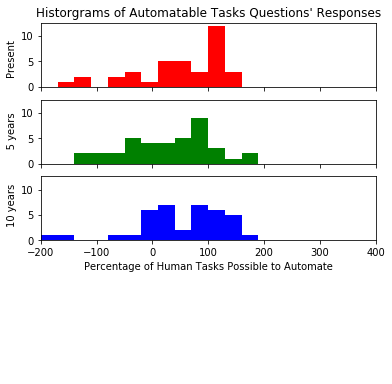

In [471]:
f1, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.set_title('Historgrams of Automatable Tasks Questions\' Responses')
n, bins, patches = ax1.hist(points3.iloc[:,0],bins=20,range=(-200,400),color='red')#'powderblue')
#(mu, sigma) = norm.fit(q5.Q5a)
n, bins, patches = ax2.hist(points2.iloc[:,0],bins=20,range=(-200,400),color='green')#'skyblue')
plt.ylabel('                                                '+\
            '10 years           5 years           Present')
n, bins, patches = ax3.hist(points1.iloc[:,0],bins=20,range=(-200,400),color='blue')#'steelblue')
plt.xlim(-200,400)
plt.xlabel('Percentage of Human Tasks Possible to Automate')
plt.savefig('PercentageTasksHistograms.png')
plt.show()

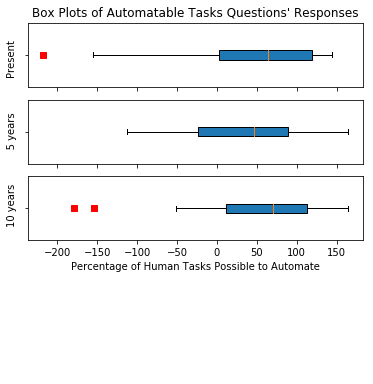

In [472]:
f1, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.set_title('Box Plots of Automatable Tasks Questions\' Responses')
ax1.boxplot(points3.iloc[:,0],0,'rs',0,patch_artist=True)#,showfliers=False)
ax2.boxplot(points2.iloc[:,0],0,'rs',0,patch_artist=True)
ax3.boxplot(points1.iloc[:,0],0,'rs',0,patch_artist=True)
plt.xlabel('Percentage of Human Tasks Possible to Automate')

ax1.set_yticklabels([])
ax2.set_yticklabels([])
ax3.set_yticklabels([])
plt.ylabel('                                                '+\
            '10 years           5 years           Present')
plt.savefig('PercentageTasksBoxplots.png')
plt.show()

### All Games but AU

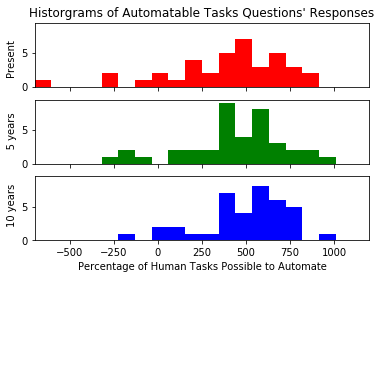

In [459]:
f1, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.set_title('Historgrams of Automatable Tasks Questions\' Responses')
n, bins, patches = ax1.hist(points3.iloc[:,0],bins=20,range=(-700,1200),color='red')#'powderblue')
#(mu, sigma) = norm.fit(q5.Q5a)
n, bins, patches = ax2.hist(points2.iloc[:,0],bins=20,range=(-700,1200),color='green')#'skyblue')
plt.ylabel('                                                '+\
            '10 years           5 years           Present')
n, bins, patches = ax3.hist(points1.iloc[:,0],bins=20,range=(-700,1200),color='blue')#'steelblue')
plt.xlim(-700,1200)
plt.xlabel('Percentage of Human Tasks Possible to Automate')
plt.savefig('PercentageTasksHistograms.png')
plt.show()

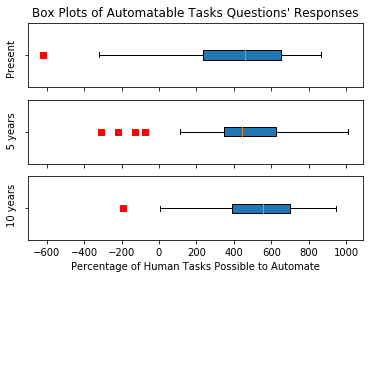

In [460]:
f1, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.set_title('Box Plots of Automatable Tasks Questions\' Responses')
ax1.boxplot(points3.iloc[:,0],0,'rs',0,patch_artist=True)#,showfliers=False)
ax2.boxplot(points2.iloc[:,0],0,'rs',0,patch_artist=True)
ax3.boxplot(points1.iloc[:,0],0,'rs',0,patch_artist=True)
plt.xlabel('Percentage of Human Tasks Possible to Automate')

ax1.set_yticklabels([])
ax2.set_yticklabels([])
ax3.set_yticklabels([])
plt.ylabel('                                                '+\
            '10 years           5 years           Present')
plt.savefig('PercentageTasksBoxplots.png')
plt.show()

### ALL Games 

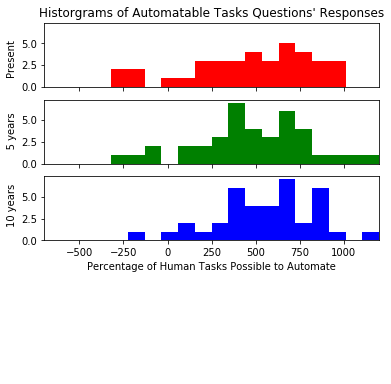

In [485]:
f1, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.set_title('Historgrams of Automatable Tasks Questions\' Responses')
n, bins, patches = ax1.hist(points3.iloc[:,0],bins=20,range=(-700,1200),color='red')#'powderblue')
#(mu, sigma) = norm.fit(q5.Q5a)
n, bins, patches = ax2.hist(points2.iloc[:,0],bins=20,range=(-700,1200),color='green')#'skyblue')
plt.ylabel('                                                '+\
            '10 years           5 years           Present')
n, bins, patches = ax3.hist(points1.iloc[:,0],bins=20,range=(-700,1200),color='blue')#'steelblue')
plt.xlim(-700,1200)
plt.xlabel('Percentage of Human Tasks Possible to Automate')
plt.savefig('PercentageTasksHistograms.png')
plt.show()

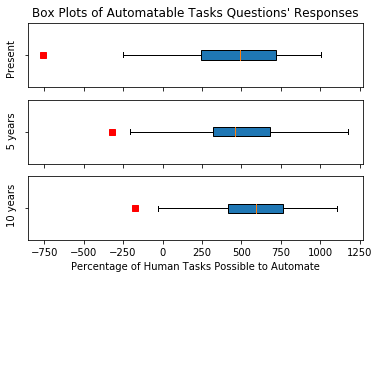

In [486]:
f1, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.set_title('Box Plots of Automatable Tasks Questions\' Responses')
ax1.boxplot(points3.iloc[:,0],0,'rs',0,patch_artist=True)#,showfliers=False)
ax2.boxplot(points2.iloc[:,0],0,'rs',0,patch_artist=True)
ax3.boxplot(points1.iloc[:,0],0,'rs',0,patch_artist=True)
plt.xlabel('Percentage of Human Tasks Possible to Automate')

ax1.set_yticklabels([])
ax2.set_yticklabels([])
ax3.set_yticklabels([])
plt.ylabel('                                                '+\
            '10 years           5 years           Present')
plt.savefig('PercentageTasksBoxplots.png')
plt.show()

# STATS


In [494]:
import statsmodels.api as sm

In [509]:
sm.stats.ttest_ind(points3.iloc[:,0], pd.concat([points2.iloc[:,0],points1.iloc[:,0]], axis=0), alternative='two-sided', usevar='pooled', weights=(None, None), value=0)

(-1.1257989919856393, 0.262635967375361, 113.0)

In [1757]:
t0 = pd.read_csv("AU Forecasting Control Group.csv")
Q1 = list(t0.iloc[:,-19])
for i in range (len(Q1)):
    if '5' in str(Q1[i]) and '2.15' not in str(Q1[i]) and '1.05' not in str(Q1[i]):
        #print (Q1[i])
        Q1[i] = 1
    else:
        #print (Q1[i])
        Q1[i] = 0
Q2 = list(t0.iloc[:,-17])
for i in range (len(Q2)):
    if '5' in str(Q2[i]) and '25' not in str(Q2[i]) and 'hours' not in str(Q2[i]):
        #print (Q2[i])
        Q2[i] = 1
    else:
        #print (Q2[i])
        Q2[i] = 0
Q3 = list(t0.iloc[:,-16])
for i in range (len(Q3)):
    if '47' in str(Q3[i]) and '25' not in str(Q3[i]) and 'hours' not in str(Q3[i]):
        #print (Q3[i])
        Q3[i] = 1
    else:
        #print (Q3[i])
        Q3[i] = 0
Q4 = list(t0.iloc[:,-6])
for i in range (len(Q4)):
    if 'Never' in str(Q4[i]): #and '25' not in str(Q3[i]) and 'hours' not in str(Q3[i]):
        #print (Q3[i])
        Q4[i] = 0
    elif 'twice' in str(Q4[i]):
        Q4[i] = 1
    elif 'Once a' in str(Q4[i]):
        Q4[i] = 2
    elif '2-3' in str(Q4[i]):
        Q4[i] = 3
    else:
        #print (Q3[i])
        Q4[i] = 4
Q4 = pd.DataFrame(Q4)
t0['Qs'] = pd.DataFrame(np.sum([Q1,Q2,Q3],0))

In [1758]:
t0['Female'] = t0.index
t0.Female[t0.iloc[:,-14] == 'Female'] = 1
t0.Female[t0.iloc[:,-14] == 'Male'] = 0
t0 = pd.concat([t0.iloc[:,-4],t0.iloc[:,-1],t0[['Points', 'Minutes Spent','Qs']],t0.iloc[:,-12:-8],Q4,t0.iloc[:,-5]],axis=1)
t0.columns = ['Email Address', 'Female', 'Points', 'Minutes Spent', 'Qs','Q-8','Q-7','Q-6','Q-5','Q-4','Q-3']
t0 = t0.dropna()
emails3t = pd.concat([emails3.iloc[:,0],emails3.iloc[:,1:].sum(axis=1)],axis=1)
emails3t.columns = ['Email Address', 'Total Points']
emails3t = emails3t.merge(t0,on='Email Address')
points3t = emails3t.iloc[:,1:]
points3t['log-time'] = np.log(points3t['Minutes Spent'])

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [1759]:
points3t.iloc[15,-6] = 8
points3t.iloc[15,-5] = 4
points3t.iloc[15,-4] = 2
points3t.iloc[20,-6] = 8
points3t.iloc[20,-5] = 4
points3t.iloc[20,-4] = 8
points3t.iloc[30,-6] = 5
points3t.iloc[33,-6] = 8
points3t.iloc[36,-6] = 8
points3t.iloc[36,-5] = 10
points3t.iloc[36,-4] = 6

In [1760]:
zeros = np.zeros(points3t.shape[0])
neg = np.ones(points3t.shape[0])*-1000.
#points3t['Points'] = neg
points3t['Minutes Spent'] = zeros

In [1761]:
#points3t

In [1762]:
t120 = pd.read_csv("AU Forecasting Treatment Group A.csv")
Q1 = list(t120.iloc[:,-23])
for i in range (len(Q1)):
    if '5' in str(Q1[i]) and '2.15' not in str(Q1[i]) and '1.05' not in str(Q1[i]):
        #print (Q1[i])
        Q1[i] = 1
    else:
        #print (Q1[i])
        Q1[i] = 0
Q2 = list(t120.iloc[:,-22])
for i in range (len(Q2)):
    if '5' in str(Q2[i]) and '25' not in str(Q2[i]) and 'hours' not in str(Q2[i]):
        #print (Q2[i])
        Q2[i] = 1
    else:
        #print (Q2[i])
        Q2[i] = 0
Q3 = list(t120.iloc[:,-21])
for i in range (len(Q3)):
    if '47' in str(Q3[i]) and '25' not in str(Q3[i]) and 'hours' not in str(Q3[i]):
        #print (Q3[i])
        Q3[i] = 1
    else:
        #print (Q3[i])
        Q3[i] = 0
Q4 = list(t120.iloc[:,-4])
for i in range (len(Q4)):
    if 'Never' in str(Q4[i]): #and '25' not in str(Q3[i]) and 'hours' not in str(Q3[i]):
        #print (Q3[i])
        Q4[i] = 0
    elif 'twice' in str(Q4[i]):
        Q4[i] = 1
    elif 'Once a' in str(Q4[i]):
        Q4[i] = 2
    elif '2-3' in str(Q4[i]):
        Q4[i] = 3
    else:
        #print (Q3[i])
        Q4[i] = 4
Q4 = pd.DataFrame(Q4)
t120['Qs'] = pd.DataFrame(np.sum([Q1,Q2,Q3],0))

In [1763]:
t120['Female'] = t120.index
t120.Female[t120.iloc[:,-14] == 'Female'] = 1
t120.Female[t120.iloc[:,-14] == 'Male'] = 0
t120 = pd.concat([t120.iloc[:,-4],t120.iloc[:,-1],t120[['Points', 'Minutes Spent','Qs']],t120.iloc[:,-10:-6],Q4,t120.iloc[:,-5]],axis=1)
t120.columns = ['Email Address', 'Female', 'Points', 'Minutes Spent', 'Qs','Q-8','Q-7','Q-6','Q-5','Q-4','Q-3']
t120 = t120.dropna()
emails1t = pd.concat([emails1.iloc[:,0],emails1.iloc[:,1:].sum(axis=1)],axis=1)
emails1t.columns = ['Email Address', 'Total Points']
emails1t = emails1t.merge(t120,on='Email Address')
points1t = emails1t.iloc[:,1:]
points1t['log-time'] = np.log(points1t['Minutes Spent'])

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [1764]:
pos = np.ones(points1t.shape[0])*1000.
#points1t.Points += pos

In [1765]:
#points1t

In [1766]:
t60 = pd.read_csv("AU Forecasting Treatment Group B.csv")
Q1 = list(t60.iloc[:,-23])
for i in range (len(Q1)):
    if '5' in str(Q1[i]) and '2.15' not in str(Q1[i]) and '1.05' not in str(Q1[i]):
        #print (Q1[i])
        Q1[i] = 1
    else:
        #print (Q1[i])
        Q1[i] = 0
Q2 = list(t60.iloc[:,-22])
for i in range (len(Q2)):
    if '5' in str(Q2[i]) and '25' not in str(Q2[i]) and 'hours' not in str(Q2[i]):
        #print (Q2[i])
        Q2[i] = 1
    else:
        #print (Q2[i])
        Q2[i] = 0
Q3 = list(t60.iloc[:,-21])
for i in range (len(Q3)):
    if '47' in str(Q3[i]) and '25' not in str(Q3[i]) and 'hours' not in str(Q3[i]):
        #print (Q3[i])
        Q3[i] = 1
    else:
        #print (Q3[i])
        Q3[i] = 0
Q4 = list(t60.iloc[:,-4])
for i in range (len(Q4)):
    if 'Never' in str(Q4[i]): #and '25' not in str(Q3[i]) and 'hours' not in str(Q3[i]):
        #print (Q3[i])
        Q4[i] = 0
    elif 'twice' in str(Q4[i]):
        Q4[i] = 1
    elif 'Once a' in str(Q4[i]):
        Q4[i] = 2
    elif '2-3' in str(Q4[i]):
        Q4[i] = 3
    else:
        #print (Q3[i])
        Q4[i] = 4
Q4 = pd.DataFrame(Q4)
t60['Qs'] = pd.DataFrame(np.sum([Q1,Q2,Q3],0))

In [1767]:
t60['Female'] = t60.index
t60.Female[t60.iloc[:,-14] == 'Female'] = 1
t60.Female[t60.iloc[:,-14] == 'Male'] = 0
t60 = pd.concat([t60.iloc[:,-4],t60.iloc[:,-1],t60[['Points', 'Minutes Spent', 'Qs']],t60.iloc[:,-10:-6],Q4,t60.iloc[:,-5]],axis=1)
t60.columns = ['Email Address', 'Female', 'Points', 'Minutes Spent', 'Qs','Q-8','Q-7','Q-6','Q-5','Q-4','Q-3']
t60 = t60.dropna()
#print(t60)
emails2t = pd.concat([emails2.iloc[:,0],emails2.iloc[:,1:].sum(axis=1)],axis=1)
emails2t.columns = ['Email Address', 'Total Points']
emails2t = emails2t.merge(t60,on='Email Address')
points2t = emails2t.iloc[:,1:]
points2t['log-time'] = np.log(points2t['Minutes Spent'])

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [1768]:
# X1: D120, X2: D60, X3: Qs, X4: Points, X5: Female, X6: log(Completion Time), Games Attended,
# X7: Games Attended, X8: SEC Games Watched, X9: Out-of-conference Games Watched, 
# X10: NFL Games Watched, X11: News Checking Frequency, X12: Self Reported Expertise
# , 

In [1769]:
X = np.zeros((points1t.shape[0]+points2t.shape[0]+points3t.shape[0],12))
#X = np.zeros((points1t.shape[0]+points2t.shape[0],12))#+points3.shape[0],3))
for i in range (points1t.shape[0]):
    X[i,0] = 1
    X[i,2] = points1t.iloc[i,4]
    X[i,3] = points1t.iloc[i,2]
    X[i,4] = points1t.iloc[i,1]
    X[i,5] = points1t.iloc[i,-1]
    X[i,6] = points1t.iloc[i,5]
    X[i,7] = points1t.iloc[i,6]
    X[i,8] = points1t.iloc[i,7]
    X[i,9] = points1t.iloc[i,8]
    X[i,10] = points1t.iloc[i,9]
    X[i,11] = points1t.iloc[i,10]
    #X[i,12] = 1

for i in range (points2t.shape[0]):
    #X[i+points1t.shape[0],0] = 1
    X[i+points1t.shape[0],1] = 1
    X[i+points1t.shape[0],2] = points2t.iloc[i,4]
    X[i+points1t.shape[0],3] = points2t.iloc[i,2]
    X[i+points1t.shape[0],4] = points2t.iloc[i,1]
    X[i+points1t.shape[0],5] = points2t.iloc[i,-1]
    X[i+points1t.shape[0],6] = points2t.iloc[i,5]
    X[i+points1t.shape[0],7] = points2t.iloc[i,6]
    X[i+points1t.shape[0],8] = points2t.iloc[i,7]
    X[i+points1t.shape[0],9] = points2t.iloc[i,8]
    X[i+points1t.shape[0],10] = points2t.iloc[i,9]
    X[i+points1t.shape[0],11] = points2t.iloc[i,10]
    #X[i+points1t.shape[0],12] = 1
    
for i in range (points3t.shape[0]):
    #print(i)
    X[i+points1t.shape[0]+points2t.shape[0],2] = points3t.iloc[i,4]
    X[i+points1t.shape[0]+points2t.shape[0],3] = points3t.iloc[i,2]
    X[i+points1t.shape[0]+points2t.shape[0],4] = points3t.iloc[i,1]
    X[i+points1t.shape[0]+points2t.shape[0],5] = points3t.iloc[i,-1]
    X[i+points1t.shape[0]+points2t.shape[0],6] = points3t.iloc[i,5]
    X[i+points1t.shape[0]+points2t.shape[0],7] = points3t.iloc[i,6]
    X[i+points1t.shape[0]+points2t.shape[0],8] = points3t.iloc[i,7]
    X[i+points1t.shape[0]+points2t.shape[0],9] = points3t.iloc[i,8]
    X[i+points1t.shape[0]+points2t.shape[0],10] = points3t.iloc[i,9]
    X[i+points1t.shape[0]+points2t.shape[0],11] = points3t.iloc[i,10]
    
#X = np.concatenate((X,x))
X = np.append(X,np.ones([X.shape[0],1]),1)
#print(X)

In [1778]:
points1t.shape

(35, 12)

In [1779]:
y = np.asarray(pd.concat([points1t.iloc[:,0],points2t.iloc[:,0],points3t.iloc[:,0]], axis=0))
#y = np.asarray(pd.concat([points1t.iloc[:,0],points2t.iloc[:,0]], axis=0))#,points3.iloc[:,0]], axis=0))

In [1780]:
model = sm.OLS(y, X)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.462
Date:                Sun, 01 Mar 2020   Prob (F-statistic):              0.150
Time:                        20:44:49   Log-Likelihood:                -842.26
No. Observations:                 120   AIC:                             1711.
Df Residuals:                     107   BIC:                             1747.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           139.9672    107.561      1.301      0.1

In [ ]:
# X1: D120, X2: D60, -X3: Qs, X4: Points, X5: Female, X6: log(Completion Time), Games Attended,
# X7: Games Attended, X8: SEC Games Watched, X9: Out-of-conference Games Watched, 
# X10: NFL Games Watched, X11: News Checking Frequency, X12: Self Reported Expertise
# , 

In [1744]:
X2 = np.concatenate([pd.DataFrame(X[:,:2]),pd.DataFrame(X[:,3:5]),pd.DataFrame(X[:,5:7]),
                     pd.DataFrame(X[:,7:11]),pd.DataFrame(X[:,:0]),pd.DataFrame(X[:,-1:])],1)

In [1745]:
model = sm.OLS(y, X2)
fit = model.fit()
#print(fit.summary())

# Home team only predictions (i.e. assumed experts):

In [1717]:
model = sm.OLS(y, X)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     3.052
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           0.000998
Time:                        17:51:19   Log-Likelihood:                -683.93
No. Observations:                 120   AIC:                             1394.
Df Residuals:                     107   BIC:                             1430.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            65.8594     28.748      2.291      0.0

# All predictions:

In [1746]:
model = sm.OLS(y, X)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     1.847
Date:                Sun, 01 Mar 2020   Prob (F-statistic):             0.0495
Time:                        17:53:45   Log-Likelihood:                -859.46
No. Observations:                 120   AIC:                             1745.
Df Residuals:                     107   BIC:                             1781.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           205.8265    124.138      1.658      0.1

# Non-home team predictions:

In [1781]:
model = sm.OLS(y, X)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.462
Date:                Sun, 01 Mar 2020   Prob (F-statistic):              0.150
Time:                        20:45:04   Log-Likelihood:                -842.26
No. Observations:                 120   AIC:                             1711.
Df Residuals:                     107   BIC:                             1747.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           139.9672    107.561      1.301      0.1